# Explore here

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

import warnings

In [4]:
data= pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
data.to_csv('/workspaces/Finarosalina_K_Medias_ML_no_supe/data/raw/raw_data.csv')

In [6]:
# solo nos interesan las columnas Latitude, Longitude y MedInc.
data.drop(columns=['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal'], inplace=True)

In [7]:
data.describe()

,MedInc,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000
mean,3.870671,35.631861,-119.569704
std,1.899822,2.135952,2.003532
min,0.499900,32.540000,-124.350000
25%,2.563400,33.930000,-121.800000
50%,3.534800,34.260000,-118.490000
75%,4.743250,37.710000,-118.010000
max,15.000100,41.950000,-114.310000


Viendo los valores de MedInc, está claro que tiene outliers por la parte alta, conviene observarlos y si no son demasiados eliminarlos.

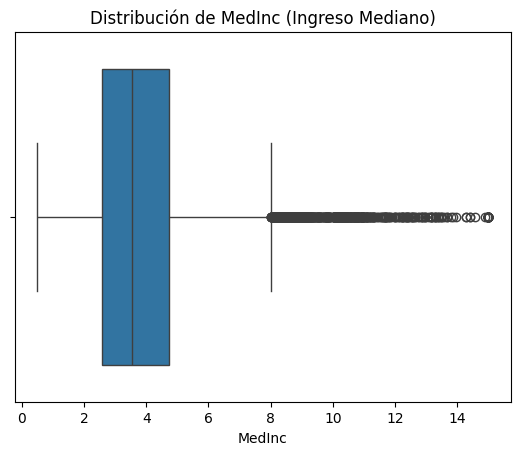

In [8]:
sns.boxplot(x=data['MedInc'])
plt.title("Distribución de MedInc (Ingreso Mediano)")
plt.show()


In [9]:
# Filtrar por debajo del percentil 95
data_filtered = data[data['MedInc'] < data['MedInc'].quantile(0.95)]
data_filtered.shape


(19608, 3)

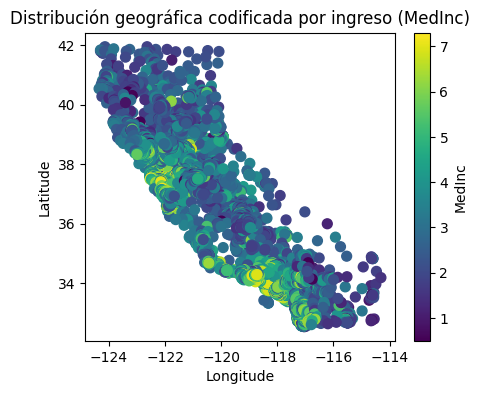

In [10]:
plt.figure(figsize=(5, 4))

#  Longitud vs Latitud, codificando MedInc con color
scatter = plt.scatter(data_filtered['Longitude'], data_filtered['Latitude'],
                      c=data_filtered['MedInc'], cmap='viridis', s=50)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribución geográfica codificada por ingreso (MedInc)")
plt.colorbar(scatter, label='MedInc')  # Muestra la escala de colores

plt.show()


In [11]:
X = data_filtered[['Latitude', 'Longitude', 'MedInc']]


In [12]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  


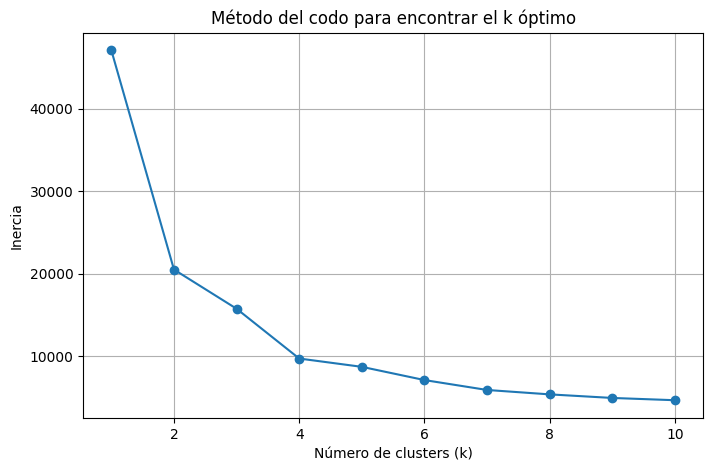

In [13]:
inercias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inercias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para encontrar el k óptimo')
plt.grid(True)
plt.show()


In [ ]:
# viendo la gráfica dudaba entre k=2 y K=4, pero se consigue mejor Silhouette Score con k=2

kmeans = KMeans(n_clusters=2, random_state=42)
train_labels = kmeans.fit_predict(X_train_scaled)


In [15]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_train_scaled, train_labels)
print(f"Silhouette Score para el conjunto de entrenamiento: {silhouette_avg}")

Silhouette Score para el conjunto de entrenamiento: 0.522773948640415


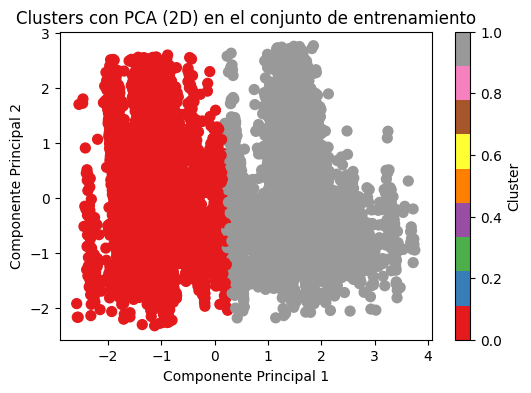

Varianza explicada por cada componente: [0.64237593 0.33377623]
Varianza total explicada: 0.9761521628398622


In [16]:

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled) 

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_pca)
train_labels = kmeans.labels_

plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_labels, cmap='Set1', s=50)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters con PCA (2D) en el conjunto de entrenamiento")
plt.colorbar(scatter, label='Cluster')
plt.show()

print(f"Varianza explicada por cada componente: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_)}")



Visualmetne se aprecia la mejora, además que con una componente menos se explican el 97% de los datos, lo que es logico, pq hay una cierta relación.


Muestra de datos con clusters asignados:
       Latitude  Longitude  MedInc cluster
8157      33.81    -118.12  4.6087       2
20171     34.39    -119.30  4.6900       5
11996     33.94    -117.53  4.2263       2
9534      37.44    -120.76  2.7562       3
18968     38.27    -122.02  3.2115       3

Distribución de clusters:
cluster
0    2813
1    1220
2    3620
3    3486
4    2504
5    2043
Name: count, dtype: int64


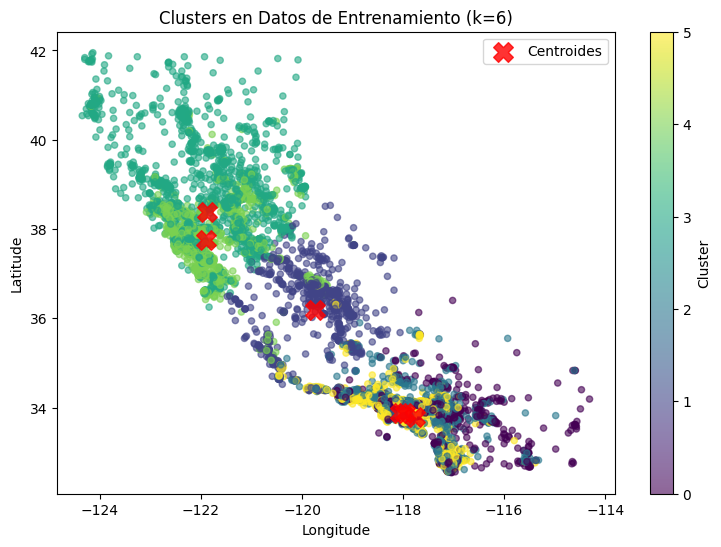

Silhouette Score (train): 0.3903


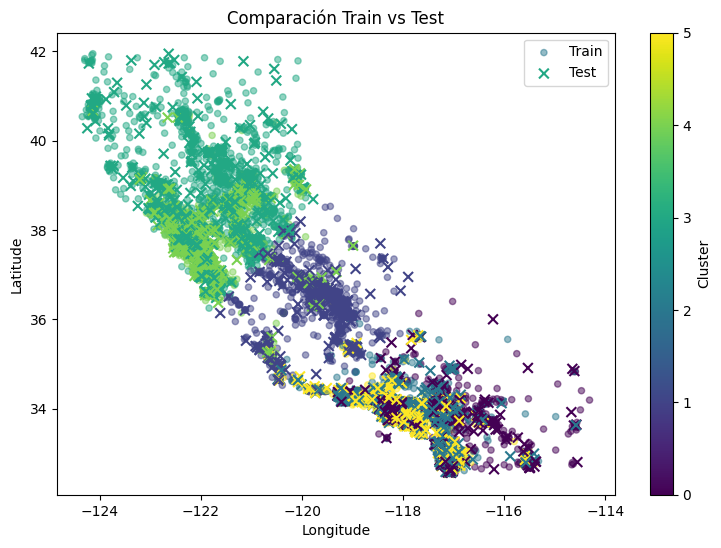

Silhouette Score (test): 0.3854

Distribución en train:
cluster
0    2813
1    1220
2    3620
3    3486
4    2504
5    2043
Name: count, dtype: int64

Distribución en test:
cluster
0    802
1    303
2    914
3    853
4    579
5    471
Name: count, dtype: int64


In [20]:
# Pero aunque tenga peor score, el proyecto pide crear y entrenar K-Means con k=6

# Entrenamiento de K-Means con k=6

kmeans_6 = KMeans(n_clusters=6, random_state=42, n_init=10)  # n_init para evitar warnings
clusters = kmeans_6.fit_predict(X_train_scaled)


X_train['cluster'] = pd.Categorical(clusters)

print("\nMuestra de datos con clusters asignados:")
print(X_train[['Latitude', 'Longitude', 'MedInc', 'cluster']].head())
print("\nDistribución de clusters:")
print(X_train['cluster'].value_counts().sort_index())
plt.figure(figsize=(9, 6))
plt.scatter(X_train['Longitude'], X_train['Latitude'], 
            c=X_train['cluster'], cmap='viridis', s=20, alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters en Datos de Entrenamiento (k=6)')

# Mostrar centros de clusters (en escala original)
centers_original = scaler.inverse_transform(kmeans_6.cluster_centers_)
plt.scatter(centers_original[:, 1], centers_original[:, 0], 
            c='red', s=200, marker='X', alpha=0.8, label='Centroides')
plt.legend()
plt.show()

print(f"Silhouette Score (train): {silhouette_score(X_train_scaled, X_train['cluster']):.4f}")


X_test['cluster'] = kmeans_6.predict(X_test_scaled)

# Visualización conjunta
plt.figure(figsize=(9, 6))
plt.scatter(X_train['Longitude'], X_train['Latitude'], 
            c=X_train['cluster'], cmap='viridis', s=20, alpha=0.5, label='Train')
plt.scatter(X_test['Longitude'], X_test['Latitude'], 
            c=X_test['cluster'], cmap='viridis', s=50, marker='x', label='Test')
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Comparación Train vs Test')
plt.legend()
plt.show()

#  test
print(f"Silhouette Score (test): {silhouette_score(X_test_scaled, X_test['cluster']):.4f}")

# Análisis comparativo
print("\nDistribución en train:")
print(X_train['cluster'].value_counts().sort_index())
print("\nDistribución en test:")
print(X_test['cluster'].value_counts().sort_index())


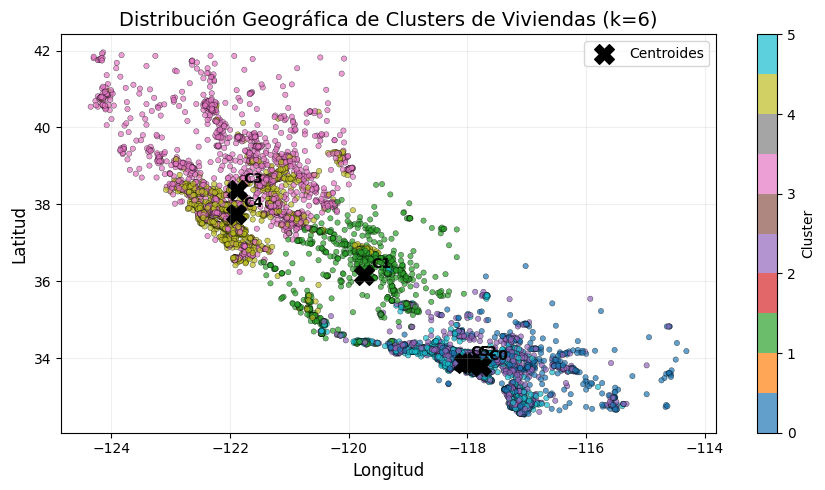

In [23]:
plt.figure(figsize=(9, 5))
scatter = plt.scatter(
    x=X_train['Longitude'],
    y=X_train['Latitude'],
    c=X_train['cluster'].cat.codes,  # códigos numéricos de las categorías
    cmap='tab10',  # Mejor paleta para distinguir clusters
    s=15,
    alpha=0.7,
    edgecolor='k',
    linewidth=0.3
)

# Añadir centroides
centers = scaler.inverse_transform(kmeans_6.cluster_centers_)
plt.scatter(
    x=centers[:, 1],  # Longitude
    y=centers[:, 0],  # Latitude
    c='black',
    marker='X',
    s=200,
    label='Centroides'
)

plt.colorbar(scatter, label='Cluster', ticks=range(6))
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.title('Distribución Geográfica de Clusters de Viviendas (k=6)', fontsize=14)
plt.grid(alpha=0.2)
plt.legend()

# Anotar los centroides
for i, center in enumerate(centers):
    plt.annotate(
        f'C{i}',
        xy=(center[1], center[0]),
        xytext=(5, 5),
        textcoords='offset points',
        weight='bold'
    )

plt.tight_layout()
plt.show()

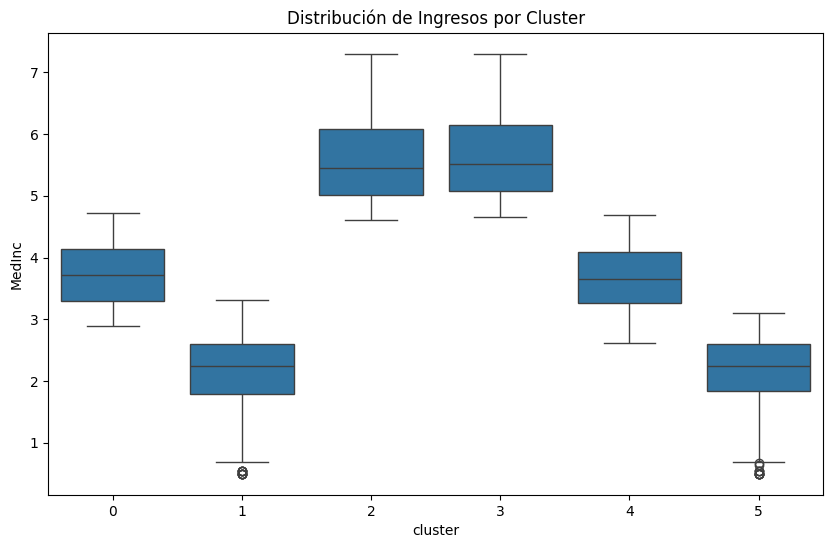

In [18]:
# Análisis de ingresos por cluster
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='MedInc', data=X_train)
plt.title('Distribución de Ingresos por Cluster')
plt.show()


In [ ]:
import joblib

joblib.dump(kmeans_6, 'kmeans_6_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


Modelo y scaler guardados correctamente



A la vista de los gráficos yo diría que sobran centroides, porque hay varios conjuntos de datos que se solapan, por lo que yo lo haría de nuevo con K= 2

In [1]:
# 1. Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# 2. Entrenamiento de K-Means con K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
train_labels = kmeans.fit_predict(X_train_pca)

# 3. Asignación de clusters al DataFrame (CORRECCIÓN: usando train_labels en lugar de clusters)
X_train['cluster'] = pd.Categorical(train_labels)

# 4. Visualización mejorada
plt.figure(figsize=(7, 5))
scatter = plt.scatter(
    X_train_pca[:, 0], 
    X_train_pca[:, 1], 
    c=X_train['cluster'].cat.codes,  # Usando los códigos categóricos
    cmap='Set1', 
    s=50,
    alpha=0.8,
    edgecolor='k',
    linewidth=0.5
)

# Centroides con anotaciones
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='yellow',
    marker='X',
    s=250,
    edgecolor='k',
    linewidth=1.5,
    label='Centroides'
)

# Añadir etiquetas a los centroides
for i, centroid in enumerate(centroids):
    plt.text(
        centroid[0], 
        centroid[1]+0.1,  # Pequeño desplazamiento vertical
        f'Centroide {i}',
        fontsize=10,
        ha='center',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
    )

plt.xlabel("Componente Principal 1", fontsize=12)
plt.ylabel("Componente Principal 2", fontsize=12)
plt.title("Clusters con PCA (2D) - K=2\nVarianza Total Explicada: {:.2%}".format(
    np.sum(pca.explained_variance_ratio_)), fontsize=14)
plt.colorbar(scatter, label='Cluster', ticks=[0, 1])
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Análisis de varianza
print("\nAnálisis de Componentes Principales:")
print("----------------------------------")
print(f"Varianza explicada por PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Varianza explicada por PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Varianza total explicada: {np.sum(pca.explained_variance_ratio_):.2%}")

# 6. Interpretación de componentes
print("\nContribución de variables a los componentes:")
components_df = pd.DataFrame(
    pca.components_,
    columns=['Latitude', 'Longitude', 'MedInc'],
    index=['PC1', 'PC2']
)
print(components_df)

# 7. Proyectar test al espacio PCA entrenado
X_test_pca = pca.transform(X_test_scaled)

# 8. Predecir clusters para test
test_labels = kmeans.predict(X_test_pca)

# 9. Asignar los clusters al DataFrame de test
X_test['cluster'] = pd.Categorical(test_labels)

# 10. Guardar el modelo y PCA
import joblib
joblib.dump(kmeans, 'kmeans_k2_model.pkl')
joblib.dump(pca, 'pca_k2_model.pkl')
joblib.dump(scaler, 'scaler_k2.pkl')

NameError: name 'PCA' is not defined